### Import Libraries

In [21]:
# Basic Python Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# TensorFlow & Keras Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD, Adam

warnings.filterwarnings("ignore")
%matplotlib inline


<!--  -->

### Network Hyperparameters

In [22]:
n_input_layer_dimensions = 28 * 28 # Features
n_hidden_layer_1 = 10 # Number of neurons in 1st hidden layer
n_hidden_layer_2 = 5 # Number of neurons in 2nd hidden layer
n_output_layer_classes = 10 # Number of classes in output layer

<!--  -->

### Neural Network Weights Initialization

- **Xavier (Glorot) Normal initialization for Sigmoid and Tan**

In [23]:
initializer_xavier = tf.keras.initializers.GlorotNormal()

- **He Normal initialization for ReLU**

In [24]:
initializer_he = tf.keras.initializers.HeNormal()

<!--  -->

### Data Preparation

- **Train and Test Splits**

In [25]:
(X_train_images, y_train_labels), \
(X_test_images, y_test_labels) = tf.keras.datasets.mnist.load_data()

- **Flatten 28*28 pixels data format for 1 image to 1d array**

In [26]:
X_train_images = X_train_images.reshape([-1, 28*28]).astype("float32")
X_test_images = X_test_images.reshape([-1, 28*28]).astype("float32")

X_train_images[:1]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

- **Normalization**

In [27]:
X_train_images = X_train_images / 255.0
X_test_images = X_test_images / 255.0

X_train_images[:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

- **Target Class Labels into Dummy Variables**

In [28]:
y_train_labels = tf.keras.utils.to_categorical(y_train_labels, 10)
y_test_labels = tf.keras.utils.to_categorical(y_test_labels, 10)

y_train_labels[:1]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

<!--  -->

### Build Model 

In [29]:
def build_model(activation, initializer):
    model = Sequential()
    model.add(Dense(n_hidden_layer_1, input_shape=(n_input_layer_dimensions,), kernel_initializer=initializer))
    model.add(Activation(activation))
    model.add(Dense(n_hidden_layer_2, kernel_initializer=initializer))
    model.add(Activation(activation))
    model.add(Dense(n_output_layer_classes, kernel_initializer=initializer))
    model.add(Activation("softmax"))
    return model

<!--  -->

### Train and Evaluate Model

In [41]:
def train_and_evaluate(activation, optimizer_class, learning_rate, initializer, 
                        X_train_images, y_train_labels,
                        X_test_images, y_test_labels,
                        num_epochs):
    model = build_model(activation, initializer)
    optimizer = optimizer_class(learning_rate = learning_rate)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(X_train_images, y_train_labels, 
                        epochs=num_epochs, batch_size=100, 
                        validation_data = (X_test_images, y_test_labels), 
                        verbose=1)
    test_loss, test_accuracy = model.evaluate(X_test_images, y_test_labels, verbose=0)
    return history.history["loss"], test_accuracy

<!--  -->

### Plots Loss over Epochs

In [42]:
def plot_loss(num_epochs, losses, title):
    sns.set_style("dark")
    plt.plot(range(1, num_epochs + 1), losses, "b", label="Train Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.show()

<!--  -->

### Model Hyperparameters

In [43]:
num_epochs = 10
activations = ["sigmoid", "tanh", "relu"]
optimizer_specs = {
    "SGD": (SGD, 0.05)
}

<!--  -->

### Execute Training

Training model with sigmoid activation and SGD optimizer...
Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1291 - loss: 2.2989 - val_accuracy: 0.2850 - val_loss: 2.2021
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3025 - loss: 2.1528 - val_accuracy: 0.3485 - val_loss: 1.9695
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - accuracy: 0.3850 - loss: 1.9115 - val_accuracy: 0.4577 - val_loss: 1.7181
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.4953 - loss: 1.6584 - val_accuracy: 0.5874 - val_loss: 1.4740
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.6179 - loss: 1.4264 - val_accuracy: 0.7131 - val_loss: 1.2513
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - accuracy: 0.7193 - loss: 1.2079 - val_accuracy: 0.7562 - val_loss: 1.0614
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.7522 - loss: 1.0309 - val_accuracy: 0.7792 - val_loss: 0.9205
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━

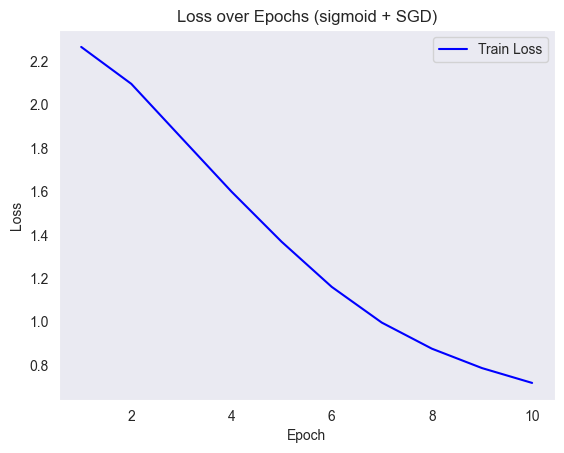

Test Accuracy with sigmoid activation and SGD optimizer:  0.84
Training model with tanh activation and SGD optimizer...
Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5563 - loss: 1.5862 - val_accuracy: 0.8409 - val_loss: 0.7572
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.8481 - loss: 0.6777 - val_accuracy: 0.8799 - val_loss: 0.4969
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.8825 - loss: 0.4768 - val_accuracy: 0.8964 - val_loss: 0.4028
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.8993 - loss: 0.3962 - val_accuracy: 0.9084 - val_loss: 0.3564
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - accuracy: 0.9077 - loss: 0.3546 - val_accuracy: 0.9114 - val_loss: 0.3363
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.9106 - loss: 0.3357 - val_accuracy: 0.9177 - val_loss: 0.3178
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.9180 - loss: 0.3093 - val_accuracy

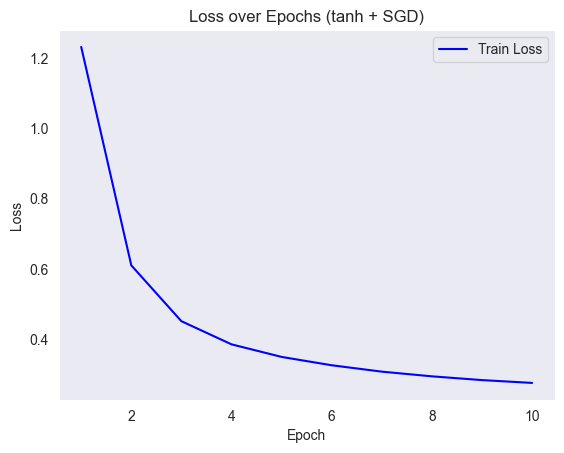

Test Accuracy with tanh activation and SGD optimizer:  0.92
Training model with relu activation and SGD optimizer...
Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4690 - loss: 1.5879 - val_accuracy: 0.8433 - val_loss: 0.6003
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8480 - loss: 0.5634 - val_accuracy: 0.8818 - val_loss: 0.4490
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - accuracy: 0.8754 - loss: 0.4507 - val_accuracy: 0.8940 - val_loss: 0.3963
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.8926 - loss: 0.3929 - val_accuracy: 0.9009 - val_loss: 0.3639
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.9017 - loss: 0.3603 - val_accuracy: 0.9087 - val_loss: 0.3453
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.9071 - loss: 0.3416 - val_accuracy: 0.9091 - val_loss: 0.3404
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.9107 - loss: 0.3224 - val_accuracy: 0.9

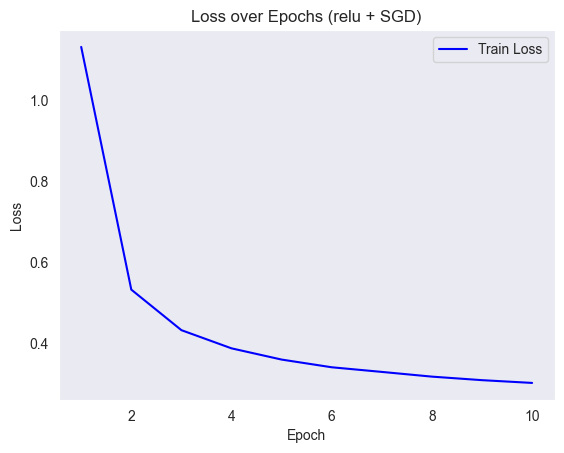

Test Accuracy with relu activation and SGD optimizer:  0.92


In [44]:
for activation in activations:
    for opt_name, (optimizer_class, learning_rate) in optimizer_specs.items():
        if activation == "relu":
            initializer = initializer_he
        else:
            initializer = initializer_xavier

        print(f"Training model with {activation} activation and {opt_name} optimizer...")
        losses, test_accuracy = train_and_evaluate(activation, 
                                                    optimizer_class, 
                                                    learning_rate, 
                                                    initializer,
                                                    X_train_images, y_train_labels,
                                                    X_test_images, y_test_labels,
                                                    num_epochs)
        plot_loss(num_epochs, losses, f"Loss over Epochs ({activation} + {opt_name})")
        print(f"Test Accuracy with {activation} activation and {opt_name} optimizer: {test_accuracy: .2f}")

### Observations

- Out of all combinations tanh / relU with SGD seems to be better parameters with less epochs and minor deep learning model.
- We can also add more optimizers i.e., Adam and can also increase hidden layers along with higher neurons in each network.